# **Prediction using Supervised ML**

#### To Predict the percentage of an student based on the no. of study hours.<br>This is a simple linear regression task as it involves just 2 variables.

### Question to answer<br>**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
# Load Data From Url Link
score = "http://bit.ly/w-data"
s_data = pd.read_csv(score)

# View the first 10 rows of data
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### **Data Information**

In [ ]:
# Shape of data
s_data.shape

(25, 2)

This data contains 25 rows and 2 columns.

In [ ]:
# Check for duplicate values
s_data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

There are no duplicates in this data.

In [ ]:
# Check for missing values
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

The data has no missing value.

In [ ]:
# View columns datatype
s_data.dtypes

Hours     float64
Scores      int64
dtype: object

The hours column has **float** datatype while the scores column has **integer** datatype.

### **Distribution of scores**

To view the relationship between the hours spent on studying and the scores gotten by the students.

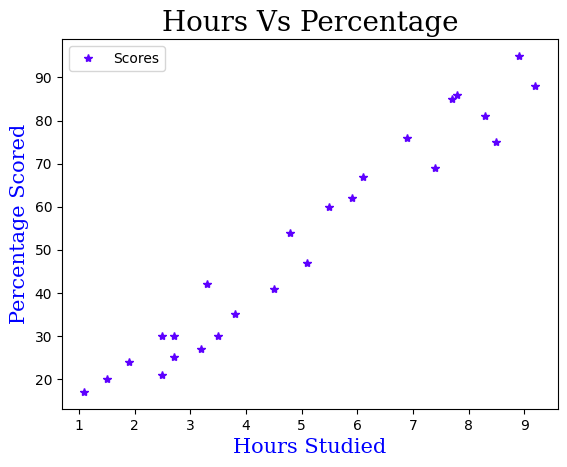

In [ ]:
# Plot Distribution of Scores.
x = "Hours"
y = "Scores"
color = "#5d00ff"
font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'blue','size':15}
s_data.plot (x, y, color = color, style = "*")
plt.title("Hours Vs Percentage", fontdict = font1)
plt.xlabel("Hours Studied", fontdict = font2)
plt.ylabel("Percentage Scored", fontdict = font2)

plt.show()

**The graph above indicates that there is a positive linear relationship between the number of hours studied and the percentage score (i.e., the more time a student spent studying, the higher the score).**

### **Identify Input and Target**

x = Input <br> y = Target (Output)

In [ ]:
x = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

In [ ]:
# verify
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

### **Split Data**

Split Data into: <br> Train Set <br> Test Set <br> *This is done using Scikit-Learn's built-in train_test_split() method*

In [ ]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2
RANDOM_STATE = 100

x_train, x_test, y_train, y_test = train_test_split (
    x, y, test_size = TEST_SIZE, random_state = RANDOM_STATE
    )

x_train.shape, x_test.shape

((20, 1), (5, 1))

The algorithm is trained with 20 rows (80% of the data) and tested with 5 rows(20% of the data).

### **Train Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate
regressor = LinearRegression()

# Fit (i.e. train the model)
regressor.fit(x_train, y_train)

LinearRegression()

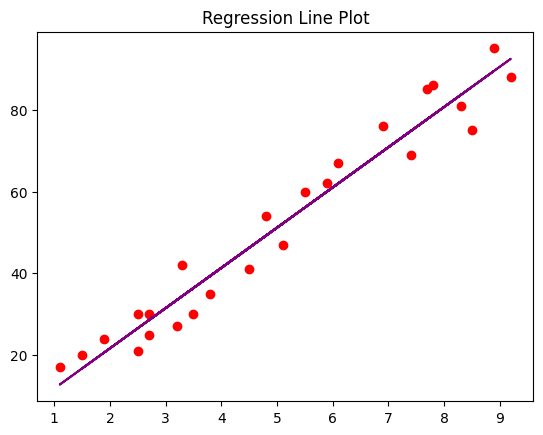

In [ ]:
# Plot Regression Line
reg_line = regressor.coef_*x+regressor.intercept_

plt.scatter (x, y, color = "red")
plt.title("Regression Line Plot")
plt.plot(x, reg_line, color = "purple")

plt.show()

### **Make Predictions**

In [ ]:
# View Test Data
x_test

array([[2.7],
       [3.8],
       [3.3],
       [5.9],
       [1.5]])

In [ ]:
# Predic Scores
y_pred = regressor.predict(x_test)
y_pred

array([28.54512294, 39.36411177, 34.44638957, 60.01854497, 16.74258969])

In [ ]:
# Compare Actual Score and Predicted Score
result = pd.DataFrame()
result["Actual"] = y_test
result["Predicted"] = y_pred
result["Error"] = y_test - y_pred

result

,Actual,Predicted,Error
0,25,28.545123,-3.545123
1,35,39.364112,-4.364112
2,42,34.446390,7.553610
3,62,60.018545,1.981455
4,20,16.742590,3.257410


In [ ]:
# Percentage Error of Model
np.sum(result["Error"]) / result.shape[0]

0.9766482121988446

### **Predict with 9.25 hrs of Studying**

In [ ]:
prediction = regressor.predict([[9.25]])
prediction

array([92.96728365])

**This model predicts that if a student studies for 9.25 hours a day, such student would have a percentage score of 93%.**

### **Evaluate Model**

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_pred)

4.140342096254413

In [ ]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.9050356232459791